# Read results

In [1]:
import os
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#cwd = os.getcwd()
#cwd

In [4]:
results_folder = os.path.join("C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_LEUKEMIA")
results_folder

'C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_LEUKEMIA'

In [9]:
nzs = ["45", "89", "178", "356", "712"]
fts_modes = ["full", "random", "k-best", "k-best-mi", "sparse-pca", "pk-lpnn"]
models = ["knn", "lr", "nb-gaussian" ]#"svc"]
max_nz = 7129  # Valeur maximale de Nz

# Calcul des pourcentages
nzs_percent = [int(nz) / max_nz * 100 for nz in nzs]
results_d = {}

for nz in nzs:

    results_d[nz] = {}
    
    for fts_mode in fts_modes:
    
        results_d[nz][fts_mode] = {}
        
        for model in models:
            
            with open( os.path.join(results_folder, f"{nz}", f"{fts_mode}_{nz}_{model}.pkl"), "rb" ) as fh:
                
                results = pickle.load(fh)
                f1 = np.mean(results["f1"]).round(3)
                b_acc = np.mean(results["b_acc"]).round(3)
                # print("f1: ", f1, "b_acc: ", b_acc)
    
                results_d[nz][fts_mode][model] = (f1, b_acc)

In [6]:
results_df = {}

for nz in nzs:
    
    results_df[nz] = pd.DataFrame.from_dict(results_d[nz])

In [27]:
results_df["45"]

,full,random,k-best,k-best-mi,sparse-pca,pk-lpnn
knn,"(0.846, 0.874)","(0.655, 0.709)","(0.812, 0.871)","(0.9, 0.933)","(0.846, 0.897)","(0.879, 0.913)"
lr,"(0.894, 0.937)","(0.711, 0.766)","(0.801, 0.862)","(0.9, 0.933)","(0.885, 0.928)","(0.881, 0.916)"
nb-gaussian,"(0.77, 0.81)","(0.59, 0.673)","(0.814, 0.874)","(0.891, 0.926)","(0.822, 0.876)","(0.672, 0.77)"
svc,"(0.428, 0.543)","(0.352, 0.509)","(0.26, 0.494)","(0.315, 0.526)","(0.547, 0.621)","(0.244, 0.485)"


In [28]:
results_df["89"]

,full,random,k-best,k-best-mi,sparse-pca,pk-lpnn
knn,"(0.846, 0.874)","(0.682, 0.731)","(0.854, 0.906)","(0.903, 0.938)","(0.873, 0.911)","(0.886, 0.922)"
lr,"(0.894, 0.937)","(0.767, 0.836)","(0.832, 0.888)","(0.897, 0.933)","(0.909, 0.942)","(0.879, 0.92)"
nb-gaussian,"(0.77, 0.81)","(0.671, 0.743)","(0.872, 0.918)","(0.89, 0.929)","(0.87, 0.909)","(0.762, 0.835)"
svc,"(0.428, 0.543)","(0.362, 0.517)","(0.246, 0.487)","(0.296, 0.51)","(0.525, 0.601)","(0.246, 0.487)"


In [30]:
# Good!
results_df["178"]

,full,random,k-best,k-best-mi,sparse-pca,pk-lpnn
knn,"(0.846, 0.874)","(0.768, 0.804)","(0.851, 0.904)","(0.913, 0.946)","(0.889, 0.923)","(0.913, 0.945)"
lr,"(0.894, 0.937)","(0.807, 0.858)","(0.852, 0.903)","(0.9, 0.936)","(0.912, 0.945)","(0.912, 0.947)"
nb-gaussian,"(0.77, 0.81)","(0.705, 0.768)","(0.885, 0.927)","(0.878, 0.921)","(0.898, 0.932)","(0.856, 0.903)"
svc,"(0.428, 0.543)","(0.379, 0.52)","(0.244, 0.485)","(0.278, 0.499)","(0.449, 0.558)","(0.246, 0.487)"


In [31]:
results_df["356"]

,full,random,k-best,k-best-mi,sparse-pca,pk-lpnn
knn,"(0.846, 0.874)","(0.8, 0.84)","(0.886, 0.928)","(0.92, 0.95)","(0.896, 0.929)","(0.916, 0.944)"
lr,"(0.894, 0.937)","(0.868, 0.913)","(0.882, 0.926)","(0.912, 0.948)","(0.927, 0.954)","(0.908, 0.941)"
nb-gaussian,"(0.77, 0.81)","(0.749, 0.807)","(0.888, 0.926)","(0.886, 0.925)","(0.876, 0.916)","(0.884, 0.91)"
svc,"(0.428, 0.543)","(0.372, 0.525)","(0.244, 0.485)","(0.277, 0.496)","(0.406, 0.516)","(0.312, 0.52)"


In [32]:
results_df["712"]

,full,random,k-best,k-best-mi,sparse-pca,pk-lpnn
knn,"(0.846, 0.874)","(0.815, 0.855)","(0.901, 0.938)","(0.923, 0.952)","(0.902, 0.93)","(0.915, 0.939)"
lr,"(0.894, 0.937)","(0.864, 0.914)","(0.9, 0.937)","(0.908, 0.945)","(0.925, 0.952)","(0.911, 0.948)"
nb-gaussian,"(0.77, 0.81)","(0.775, 0.831)","(0.883, 0.924)","(0.901, 0.93)","(0.891, 0.929)","(0.842, 0.877)"
svc,"(0.428, 0.543)","(0.382, 0.515)","(0.244, 0.485)","(0.324, 0.522)","(0.401, 0.518)","(0.325, 0.504)"


In [35]:
results_folder = os.path.join(cwd, "results/genetic_data_DLBCL")
results_folder

'/Users/jeremie.cabessau-paris2.fr/Desktop/MAIN/Students/2024_Nourane_Fradi/code/results/genetic_data_DLBCL'

In [36]:
nzs = ["68", "137", "273", "547"]
fts_modes = ["full", "random", "k-best", "k-best-mi", "sparse-pca", "pk-lpnn"]
models = ["knn", "lr", "nb-gaussian", "svc"]

results_d = {}

for nz in nzs:

    results_d[nz] = {}
    
    for fts_mode in fts_modes:
    
        results_d[nz][fts_mode] = {}
        
        for model in models:
            
            with open( os.path.join(results_folder, f"{nz}", f"{fts_mode}_{nz}_{model}.pkl"), "rb" ) as fh:
                
                results = pickle.load(fh)
                f1 = np.mean(results["f1"]).round(3)
                b_acc = np.mean(results["b_acc"]).round(3)
                # print("f1: ", f1, "b_acc: ", b_acc)
    
                results_d[nz][fts_mode][model] = (f1, b_acc)

In [37]:
results_df = {}

for nz in nzs:
    
    results_df[nz] = pd.DataFrame.from_dict(results_d[nz])

In [38]:
results_df["68"]

,full,random,k-best,k-best-mi,sparse-pca,pk-lpnn
knn,"(0.622, 0.65)","(0.562, 0.616)","(0.842, 0.877)","(0.779, 0.809)","(0.519, 0.575)","(0.798, 0.856)"
lr,"(0.94, 0.971)","(0.631, 0.672)","(0.87, 0.894)","(0.728, 0.754)","(0.792, 0.838)","(0.816, 0.885)"
nb-gaussian,"(0.486, 0.553)","(0.519, 0.582)","(0.629, 0.664)","(0.455, 0.53)","(0.487, 0.546)","(0.488, 0.634)"
svc,"(0.466, 0.54)","(0.466, 0.54)","(0.466, 0.54)","(0.463, 0.537)","(0.466, 0.54)","(0.492, 0.567)"


In [39]:
results_df["137"]

,full,random,k-best,k-best-mi,sparse-pca,pk-lpnn
knn,"(0.622, 0.65)","(0.591, 0.632)","(0.829, 0.861)","(0.773, 0.825)","(0.545, 0.605)","(0.832, 0.878)"
lr,"(0.94, 0.971)","(0.717, 0.761)","(0.877, 0.906)","(0.778, 0.81)","(0.877, 0.896)","(0.856, 0.909)"
nb-gaussian,"(0.486, 0.553)","(0.524, 0.583)","(0.592, 0.637)","(0.5, 0.575)","(0.503, 0.559)","(0.7, 0.762)"
svc,"(0.466, 0.54)","(0.466, 0.54)","(0.466, 0.54)","(0.505, 0.58)","(0.466, 0.54)","(0.488, 0.562)"


In [41]:
results_df["273"]

,full,random,k-best,k-best-mi,sparse-pca,pk-lpnn
knn,"(0.622, 0.65)","(0.629, 0.67)","(0.823, 0.856)","(0.768, 0.814)","(0.567, 0.621)","(0.857, 0.894)"
lr,"(0.94, 0.971)","(0.822, 0.866)","(0.893, 0.923)","(0.805, 0.844)","(0.916, 0.939)","(0.894, 0.944)"
nb-gaussian,"(0.486, 0.553)","(0.505, 0.573)","(0.593, 0.633)","(0.5, 0.575)","(0.512, 0.579)","(0.648, 0.716)"
svc,"(0.466, 0.54)","(0.466, 0.54)","(0.466, 0.54)","(0.5, 0.575)","(0.466, 0.54)","(0.485, 0.56)"


In [42]:
results_df["547"]

,full,random,k-best,k-best-mi,sparse-pca,pk-lpnn
knn,"(0.622, 0.65)","(0.614, 0.652)","(0.82, 0.851)","(0.764, 0.811)","(0.615, 0.667)","(0.79, 0.821)"
lr,"(0.94, 0.971)","(0.906, 0.94)","(0.911, 0.938)","(0.874, 0.905)","(0.925, 0.952)","(0.942, 0.964)"
nb-gaussian,"(0.486, 0.553)","(0.523, 0.581)","(0.564, 0.612)","(0.5, 0.575)","(0.546, 0.597)","(0.57, 0.635)"
svc,"(0.466, 0.54)","(0.466, 0.54)","(0.466, 0.54)","(0.5, 0.575)","(0.466, 0.54)","(0.485, 0.56)"


In [51]:
results_folder = os.path.join(cwd, "results/genetic_data_Prostate")
results_folder

'/Users/jeremie.cabessau-paris2.fr/Desktop/MAIN/Students/2024_Nourane_Fradi/code/results/genetic_data_Prostate'

In [52]:
nzs = ["158", "315", "630", "1260"]
fts_modes = ["full", "random", "k-best", "k-best-mi", "sparse-pca", "pk-lpnn"]
models = ["knn", "lr", "nb-gaussian", "svc"]

results_d = {}

for nz in nzs:

    results_d[nz] = {}
    
    for fts_mode in fts_modes:
    
        results_d[nz][fts_mode] = {}
        
        for model in models:
            
            with open( os.path.join(results_folder, f"{nz}", f"{fts_mode}_{nz}_{model}.pkl"), "rb" ) as fh:
                
                results = pickle.load(fh)
                f1 = np.mean(results["f1"]).round(3)
                b_acc = np.mean(results["b_acc"]).round(3)
                # print("f1: ", f1, "b_acc: ", b_acc)
    
                results_d[nz][fts_mode][model] = (f1, b_acc)

In [45]:
results_df = {}

for nz in nzs:
    
    results_df[nz] = pd.DataFrame.from_dict(results_d[nz])

In [47]:
results_df["158"]

,full,random,k-best,k-best-mi,sparse-pca,pk-lpnn
knn,"(0.746, 0.777)","(0.682, 0.719)","(0.879, 0.893)","(0.852, 0.874)","(0.642, 0.687)","(0.895, 0.91)"
lr,"(0.681, 0.734)","(0.643, 0.698)","(0.883, 0.897)","(0.872, 0.892)","(0.558, 0.639)","(0.928, 0.939)"
nb-gaussian,"(0.352, 0.515)","(0.416, 0.554)","(0.877, 0.896)","(0.814, 0.842)","(0.682, 0.715)","(0.778, 0.811)"
svc,"(0.323, 0.5)","(0.325, 0.501)","(0.325, 0.501)","(0.323, 0.5)","(0.514, 0.61)","(0.323, 0.5)"


In [48]:
results_df["315"]

,full,random,k-best,k-best-mi,sparse-pca,pk-lpnn
knn,"(0.746, 0.777)","(0.723, 0.755)","(0.861, 0.879)","(0.826, 0.853)","(0.656, 0.699)","(0.896, 0.91)"
lr,"(0.681, 0.734)","(0.688, 0.739)","(0.894, 0.909)","(0.833, 0.858)","(0.578, 0.653)","(0.903, 0.917)"
nb-gaussian,"(0.352, 0.515)","(0.374, 0.526)","(0.858, 0.88)","(0.759, 0.793)","(0.65, 0.696)","(0.711, 0.753)"
svc,"(0.323, 0.5)","(0.323, 0.5)","(0.323, 0.5)","(0.323, 0.5)","(0.506, 0.607)","(0.323, 0.5)"


In [49]:
results_df["630"]

,full,random,k-best,k-best-mi,sparse-pca,pk-lpnn
knn,"(0.746, 0.777)","(0.728, 0.759)","(0.848, 0.868)","(0.815, 0.841)","(0.68, 0.72)","(0.876, 0.895)"
lr,"(0.681, 0.734)","(0.693, 0.74)","(0.867, 0.888)","(0.819, 0.845)","(0.606, 0.675)","(0.875, 0.894)"
nb-gaussian,"(0.352, 0.515)","(0.374, 0.53)","(0.804, 0.832)","(0.697, 0.742)","(0.578, 0.649)","(0.615, 0.686)"
svc,"(0.323, 0.5)","(0.325, 0.501)","(0.324, 0.501)","(0.323, 0.5)","(0.47, 0.587)","(0.323, 0.5)"


In [50]:
results_df["1260"]

,full,random,k-best,k-best-mi,sparse-pca,pk-lpnn
knn,"(0.746, 0.777)","(0.735, 0.766)","(0.811, 0.834)","(0.788, 0.817)","(0.697, 0.733)","(0.85, 0.873)"
lr,"(0.681, 0.734)","(0.682, 0.734)","(0.847, 0.87)","(0.802, 0.829)","(0.64, 0.697)","(0.842, 0.864)"
nb-gaussian,"(0.352, 0.515)","(0.363, 0.522)","(0.724, 0.76)","(0.616, 0.682)","(0.509, 0.609)","(0.492, 0.6)"
svc,"(0.323, 0.5)","(0.323, 0.5)","(0.323, 0.5)","(0.323, 0.5)","(0.421, 0.558)","(0.323, 0.5)"


**Remarks**

- For sparse-pca, the computation time increases with the number of selected features.
- For Pk-LPNN, this is not the case: computation time independent from nb of selected features.
- Pk-LPNN seems more robust: constant solid results across datasets, as opposed to sparse-pca (good and bad).
- Pk-LPNN beats k-best in some cases.
- **For the Prostate dataset, Pk-LPNN is the best method!**
- For other datasets, no clear pattern.
- Our approach open the research avenue for using compressive sampling methods for feature selection.

**Questions**
- Diminuer alpha pour sparse-pca ?
- Ajouter un dataset synthétique ?
- Ajouter un dataset multiclasse binarisé ?
- Ajouter $N_z$ à 15% ?

# 1.leukemia

## Path

In [53]:
results_folder = os.path.join("C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_LEUKEMIA")
results_folder

'C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_LEUKEMIA'

## Parameters 

In [54]:
nzs = ["45", "89", "178", "356", "712"]
fts_modes = ["full", "random", "k-best", "k-best-mi", "sparse-pca", "pk-lpnn"]
models = ["knn", "lr", "nb-gaussian" ]#"svc"]
max_nz = 7129  # Valeur maximale de Nz

# Calcul des pourcentages
nzs_percent = [int(nz) / max_nz * 100 for nz in nzs]

## Courbe des classif

### F1 Score

In [55]:
# Stockage des résultats
results_d = {}

for fts_mode in fts_modes:
    results_d[fts_mode] = {model: [] for model in models}
    
    for nz in nzs:
        for model in models:
            # Construire le chemin vers le fichier
            file_path = os.path.join(results_folder, f"{nz}", f"{fts_mode}_{nz}_{model}.pkl")
            
            # Vérification et lecture
            if os.path.exists(file_path):
                with open(file_path, "rb") as fh:
                    results = pickle.load(fh)
                    f1 = np.mean(results["f1"]).round(3)  # Moyenne de F1
                    results_d[fts_mode][model].append(f1)
            else:
                print(f"File not found: {file_path}")
                results_d[fts_mode][model].append(None)  # Aucun résultat si le fichier est absent

In [56]:
# Création du dossier pour sauvegarder les graphiques si il n'existe pas
save_folder = os.path.join("C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_LEUKEMIA/PLOT")
os.makedirs(save_folder, exist_ok=True)

In [57]:

# Tracer et sauvegarder les résultats
for fts_mode, models_data in results_d.items():
    plt.figure(figsize=(10, 6))  # Créer une nouvelle figure pour chaque méthode de sélection de caractéristiques
    for model, scores in models_data.items():
        plt.plot(nzs_percent, scores, label=model, marker='o')  # Courbe pour chaque classifieur
    
    # Titre avec le nom de données (Leukemia) ajouté
    plt.title(f"F1-Score des données Leukemia pour la méthode {fts_mode}")
    plt.xlabel("Nz (%)")
    plt.ylabel("F1-Score")
    plt.legend()
    plt.grid(False)
    
    # Sauvegarde dans un fichier PDF
    save_path = os.path.join(save_folder, f"F1_score_{fts_mode}_leukemia.pdf")
    plt.savefig(save_path)
    plt.close()  # Fermer la figure pour éviter de garder en mémoire

    print(f"Graphique sauvegardé dans : {save_path}")

Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_LEUKEMIA/PLOT_\F1_score_full_leukemia.pdf
Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_LEUKEMIA/PLOT_\F1_score_random_leukemia.pdf
Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_LEUKEMIA/PLOT_\F1_score_k-best_leukemia.pdf
Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_LEUKEMIA/PLOT_\F1_score_k-best-mi_leukemia.pdf
Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_LEUKEMIA/PLOT_\F1_score_sparse-pca_leukemia.pdf
Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_LEUKEMIA/PLOT_\F1_score_pk-lpnn_leukemia.pdf


### Balanced accuracy

In [58]:
# Stockage des résultats
results_d = {}

for fts_mode in fts_modes:
    results_d[fts_mode] = {model: [] for model in models}
    
    for nz in nzs:
        for model in models:
            # Construire le chemin vers le fichier
            file_path = os.path.join(results_folder, f"{nz}", f"{fts_mode}_{nz}_{model}.pkl")
            
            # Vérification et lecture
            if os.path.exists(file_path):
                with open(file_path, "rb") as fh:
                    results = pickle.load(fh)
                    f1 = np.mean(results["b_acc"]).round(3)  # Moyenne de F1
                    results_d[fts_mode][model].append(f1)
            else:
                print(f"File not found: {file_path}")
                results_d[fts_mode][model].append(None)  # Aucun résultat si le fichier est absent


In [59]:
# Création du dossier pour sauvegarder les graphiques si il n'existe pas
save_folder = os.path.join("C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_LEUKEMIA/PLOT")
os.makedirs(save_folder, exist_ok=True)

In [60]:
# Tracer et sauvegarder les résultats
for fts_mode, models_data in results_d.items():
    plt.figure(figsize=(10, 6))  # Créer une nouvelle figure pour chaque méthode de sélection de caractéristiques
    for model, scores in models_data.items():
        plt.plot(nzs_percent, scores, label=model, marker='o')  # Courbe pour chaque classifieur
    
    # Titre avec le nom de données (Leukemia) ajouté
    plt.title(f"Balanced accuracy des données Leukemia pour la méthode {fts_mode}")
    plt.xlabel("Nz (%)")
    plt.ylabel("Balanced accuracy")
    plt.legend()
    plt.grid(False)
    
    # Sauvegarde dans un fichier PDF
    save_path = os.path.join(save_folder, f"Balanced accuracy_{fts_mode}_leukemia.pdf")
    plt.savefig(save_path)
    plt.close()  # Fermer la figure pour éviter de garder en mémoire

    print(f"Graphique sauvegardé dans : {save_path}")

Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_LEUKEMIA/PLOT_\Balanced accuracy_full_leukemia.pdf
Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_LEUKEMIA/PLOT_\Balanced accuracy_random_leukemia.pdf
Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_LEUKEMIA/PLOT_\Balanced accuracy_k-best_leukemia.pdf
Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_LEUKEMIA/PLOT_\Balanced accuracy_k-best-mi_leukemia.pdf
Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_LEUKEMIA/PLOT_\Balanced accuracy_sparse-pca_leukemia.pdf
Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_LEUKEMIA/PLOT_\Balanced accuracy_pk-lpnn_leukemia.pd

## Courbe des méthodes

### F1 score

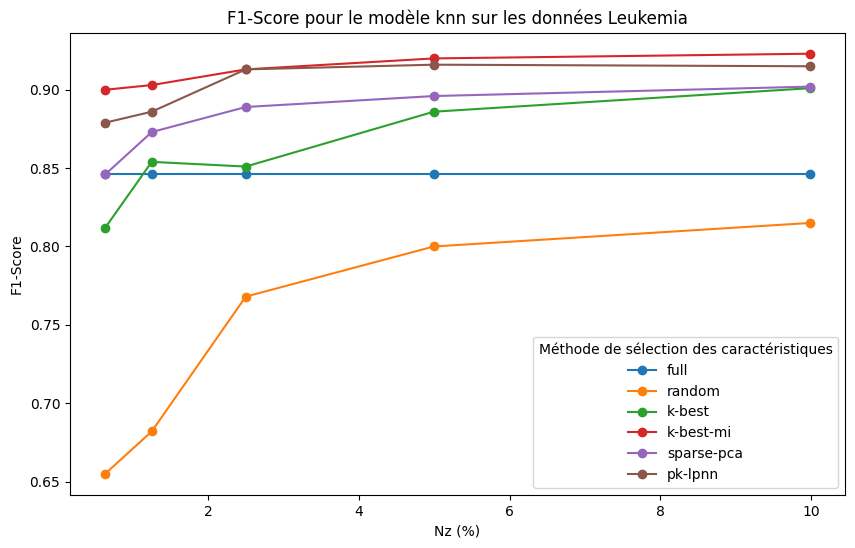

Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_LEUKEMIA/PLOT\F1_score_knn_leukemia_method.pdf


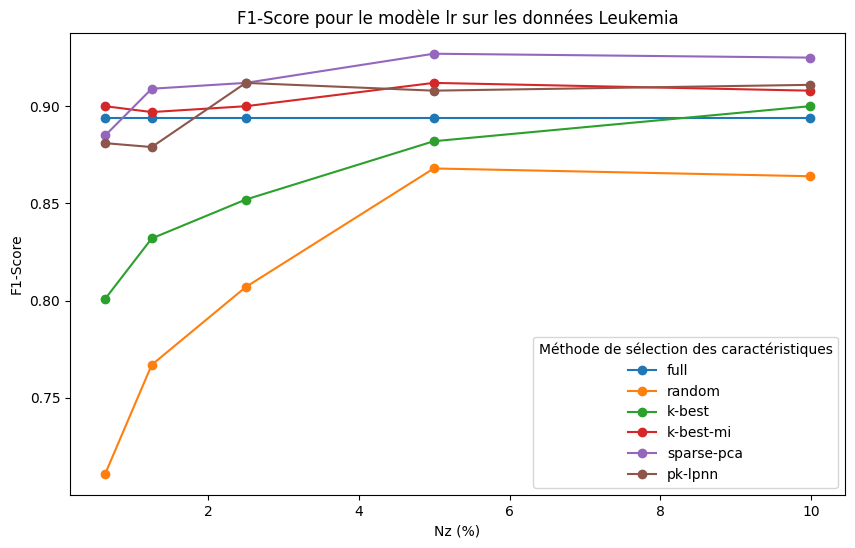

Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_LEUKEMIA/PLOT\F1_score_lr_leukemia_method.pdf


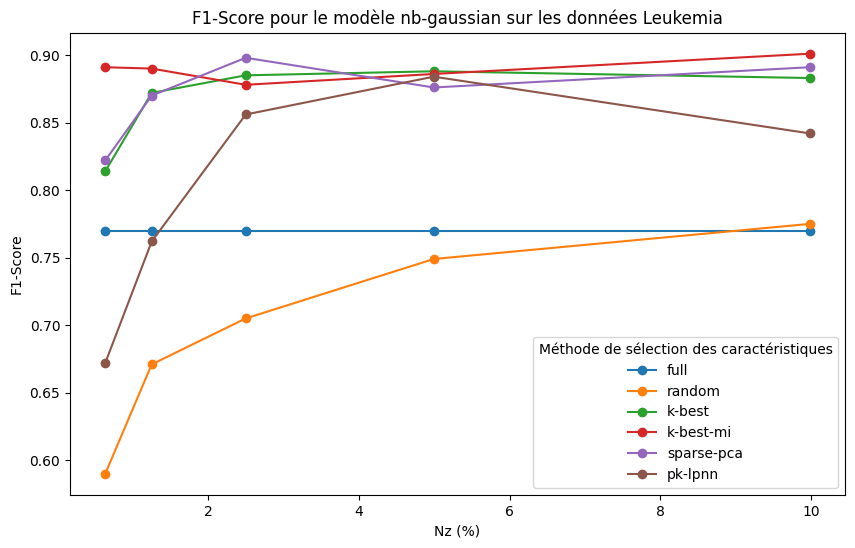

Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_LEUKEMIA/PLOT\F1_score_nb-gaussian_leukemia_method.pdf


In [40]:


# Stockage des résultats
results_d = {model: {fts_mode: [] for fts_mode in fts_modes} for model in models}

# Lecture des fichiers pour chaque modèle
for model in models:
    for fts_mode in fts_modes:
        for nz in nzs:
            file_path = os.path.join(results_folder, f"{nz}", f"{fts_mode}_{nz}_{model}.pkl")
            
            # Vérification et lecture
            if os.path.exists(file_path):
                with open(file_path, "rb") as fh:
                    results = pickle.load(fh)
                    f1 = np.mean(results["f1"]).round(3)  # Moyenne de F1
                    results_d[model][fts_mode].append(f1)
            else:
                print(f"File not found: {file_path}")
                results_d[model][fts_mode].append(None)  # Ajouter None si le fichier n'est pas trouvé

# Tracer les courbes pour chaque modèle
for model, fts_data in results_d.items():
    plt.figure(figsize=(10, 6))  # Créer une nouvelle figure pour chaque modèle
    for fts_mode, f1_scores in fts_data.items():
        plt.plot(nzs_percent, f1_scores, label=f"{fts_mode}", marker='o')  # Tracer chaque courbe pour chaque méthode
    
    # Ajouter un titre et des labels
    plt.title(f"F1-Score pour le modèle {model} sur les données Leukemia")
    plt.xlabel("Nz (%)")
    plt.ylabel("F1-Score")
    plt.legend(title="Méthode de sélection des caractéristiques")
    plt.grid(False)

    # Sauvegarder le graphique dans un fichier PDF
    save_folder = "C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_LEUKEMIA/PLOT"
    os.makedirs(save_folder, exist_ok=True)
    save_path = os.path.join(save_folder, f"F1_score_{model}_leukemia_method.pdf")
    plt.savefig(save_path)

    # Afficher le graphique
    plt.show()

    print(f"Graphique sauvegardé dans : {save_path}")

### Balanced accuracy

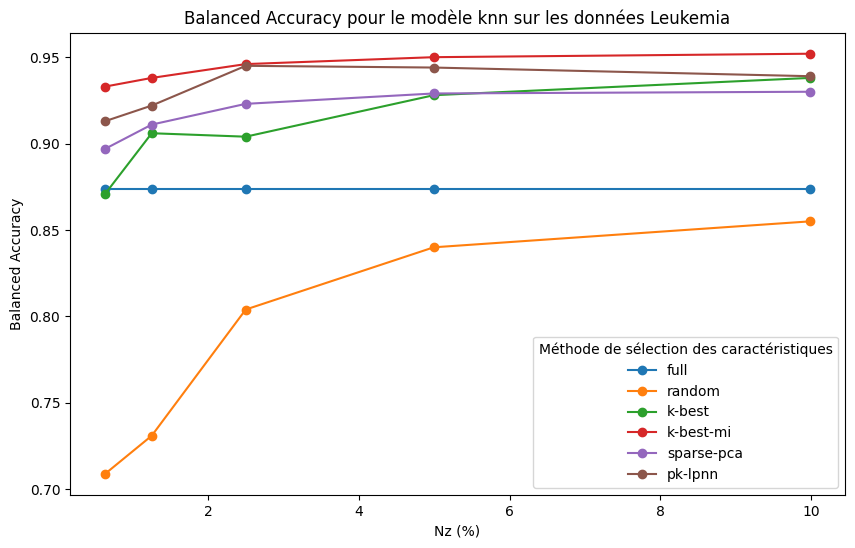

Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_LEUKEMIA/PLOT\Balanced_Accuracy_knn_leukemia_method.pdf


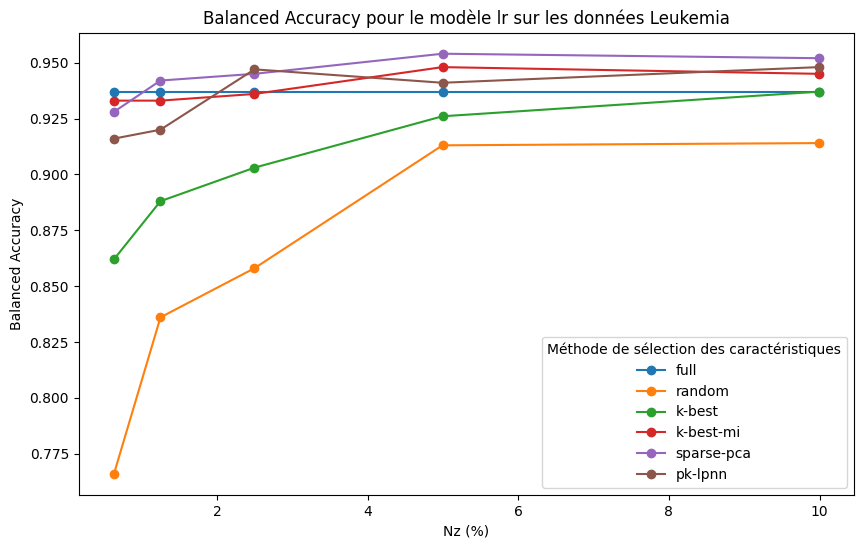

Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_LEUKEMIA/PLOT\Balanced_Accuracy_lr_leukemia_method.pdf


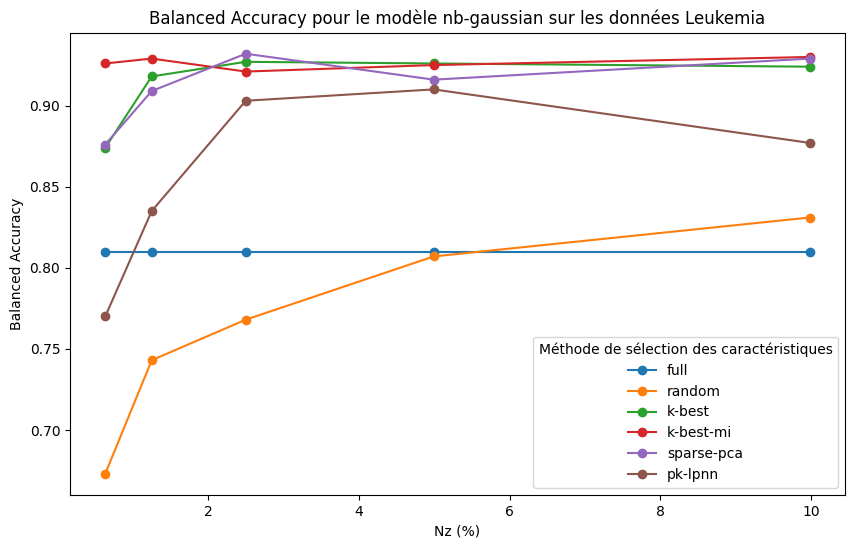

Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_LEUKEMIA/PLOT\Balanced_Accuracy_nb-gaussian_leukemia_method.pdf


In [44]:
# Stockage des résultats
results_d = {model: {fts_mode: [] for fts_mode in fts_modes} for model in models}

# Lecture des fichiers pour chaque modèle
for model in models:
    for fts_mode in fts_modes:
        for nz in nzs:
            file_path = os.path.join(results_folder, f"{nz}", f"{fts_mode}_{nz}_{model}.pkl")
            
            # Vérification et lecture
            if os.path.exists(file_path):
                with open(file_path, "rb") as fh:
                    results = pickle.load(fh)
                    b_acc = np.mean(results["b_acc"]).round(3)  # Moyenne de Balanced Accuracy
                    results_d[model][fts_mode].append(b_acc)
            else:
                print(f"File not found: {file_path}")
                results_d[model][fts_mode].append(None)  # Ajouter None si le fichier n'est pas trouvé

# Tracer les courbes pour chaque modèle
for model, fts_data in results_d.items():
    plt.figure(figsize=(10, 6))  # Créer une nouvelle figure pour chaque modèle
    for fts_mode, b_acc_scores in fts_data.items():
        plt.plot(nzs_percent, b_acc_scores, label=f"{fts_mode}", marker='o')  # Tracer chaque courbe pour chaque méthode
    
    # Ajouter un titre et des labels
    plt.title(f"Balanced Accuracy pour le modèle {model} sur les données Leukemia")
    plt.xlabel("Nz (%)")
    plt.ylabel("Balanced Accuracy")
    plt.legend(title="Méthode de sélection des caractéristiques")
    plt.grid(False)

    # Sauvegarder le graphique dans un fichier PDF
    save_folder = "C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_LEUKEMIA/PLOT"
    os.makedirs(save_folder, exist_ok=True)
    save_path = os.path.join(save_folder, f"Balanced_Accuracy_{model}_leukemia_method.pdf")
    plt.savefig(save_path)

    # Afficher le graphique
    plt.show()

    print(f"Graphique sauvegardé dans : {save_path}")

# 2.DLBCL

## Path

In [65]:
results_folder = os.path.join("C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_DLBCL")
results_folder

'C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_DLBCL'

## Parameters 

In [66]:
nzs = ["68", "137", "273", "547"]
fts_modes = ["full", "random", "k-best", "k-best-mi", "sparse-pca", "pk-lpnn"]
models = ["knn", "lr", "nb-gaussian" ]#"svc"]
max_nz = 5469  # Valeur maximale de Nz

# Calcul des pourcentages
nzs_percent = [int(nz) / max_nz * 100 for nz in nzs]


## Courbe de Classif

### F1 score

In [67]:
# Stockage des résultats
results_d = {}

for fts_mode in fts_modes:
    results_d[fts_mode] = {model: [] for model in models}
    
    for nz in nzs:
        for model in models:
            # Construire le chemin vers le fichier
            file_path = os.path.join(results_folder, f"{nz}", f"{fts_mode}_{nz}_{model}.pkl")
            
            # Vérification et lecture
            if os.path.exists(file_path):
                with open(file_path, "rb") as fh:
                    results = pickle.load(fh)
                    f1 = np.mean(results["f1"]).round(3)  # Moyenne de F1
                    results_d[fts_mode][model].append(f1)
            else:
                print(f"File not found: {file_path}")
                results_d[fts_mode][model].append(None)  # Aucun résultat si le fichier est absent

In [68]:
# Création du dossier pour sauvegarder les graphiques si il n'existe pas
save_folder = os.path.join("C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_DLBCL/PLOT")
os.makedirs(save_folder, exist_ok=True)

In [69]:
# Tracer et sauvegarder les résultats
for fts_mode, models_data in results_d.items():
    plt.figure(figsize=(10, 6))  # Créer une nouvelle figure pour chaque méthode de sélection de caractéristiques
    for model, scores in models_data.items():
        plt.plot(nzs_percent, scores, label=model, marker='o')  # Courbe pour chaque classifieur
    
    # Titre avec le nom de données (Leukemia) ajouté
    plt.title(f"F1-Score des données DLBCL pour la méthode {fts_mode}")
    plt.xlabel("Nz (%)")
    plt.ylabel("F1-Score")
    plt.legend()
    plt.grid(False)
    
    # Sauvegarde dans un fichier PDF
    save_path = os.path.join(save_folder, f"F1_score_{fts_mode}_DLBCL.pdf")
    plt.savefig(save_path)
    plt.close()  # Fermer la figure pour éviter de garder en mémoire

    print(f"Graphique sauvegardé dans : {save_path}")

Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_DLBCL/PLOT\F1_score_full_DLBCL.pdf
Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_DLBCL/PLOT\F1_score_random_DLBCL.pdf
Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_DLBCL/PLOT\F1_score_k-best_DLBCL.pdf
Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_DLBCL/PLOT\F1_score_k-best-mi_DLBCL.pdf
Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_DLBCL/PLOT\F1_score_sparse-pca_DLBCL.pdf
Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_DLBCL/PLOT\F1_score_pk-lpnn_DLBCL.pdf


### Balanced accuracy

In [70]:
# Stockage des résultats
results_d = {}

for fts_mode in fts_modes:
    results_d[fts_mode] = {model: [] for model in models}
    
    for nz in nzs:
        for model in models:
            # Construire le chemin vers le fichier
            file_path = os.path.join(results_folder, f"{nz}", f"{fts_mode}_{nz}_{model}.pkl")
            
            # Vérification et lecture
            if os.path.exists(file_path):
                with open(file_path, "rb") as fh:
                    results = pickle.load(fh)
                    f1 = np.mean(results["b_acc"]).round(3)  # Moyenne de F1
                    results_d[fts_mode][model].append(f1)
            else:
                print(f"File not found: {file_path}")
                results_d[fts_mode][model].append(None)  # Aucun résultat si le fichier est absent

In [71]:
# Création du dossier pour sauvegarder les graphiques si il n'existe pas
save_folder = os.path.join("C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_DLBCL/PLOT")
os.makedirs(save_folder, exist_ok=True)

In [72]:
# Tracer et sauvegarder les résultats
for fts_mode, models_data in results_d.items():
    plt.figure(figsize=(10, 6))  # Créer une nouvelle figure pour chaque méthode de sélection de caractéristiques
    for model, scores in models_data.items():
        plt.plot(nzs_percent, scores, label=model, marker='o')  # Courbe pour chaque classifieur
    
    # Titre avec le nom de données (Leukemia) ajouté
    plt.title(f"Balanced accuracy des données DLBCL pour la méthode {fts_mode}")
    plt.xlabel("Nz (%)")
    plt.ylabel("Balanced accuracy")
    plt.legend()
    plt.grid(False)
    
    # Sauvegarde dans un fichier PDF
    save_path = os.path.join(save_folder, f"Balanced accuracy_{fts_mode}_DLBCL.pdf")
    plt.savefig(save_path)
    plt.close()  # Fermer la figure pour éviter de garder en mémoire

    print(f"Graphique sauvegardé dans : {save_path}")

Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_DLBCL/PLOT\Balanced accuracy_full_DLBCL.pdf
Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_DLBCL/PLOT\Balanced accuracy_random_DLBCL.pdf
Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_DLBCL/PLOT\Balanced accuracy_k-best_DLBCL.pdf
Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_DLBCL/PLOT\Balanced accuracy_k-best-mi_DLBCL.pdf
Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_DLBCL/PLOT\Balanced accuracy_sparse-pca_DLBCL.pdf
Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_DLBCL/PLOT\Balanced accuracy_pk-lpnn_DLBCL.pdf


## Courbe des Méthodes

### F1 score

Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_DLBCL/PLOT\F1_score_knn_DLBCL_method.pdf
Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_DLBCL/PLOT\F1_score_lr_DLBCL_method.pdf
Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_DLBCL/PLOT\F1_score_nb-gaussian_DLBCL_method.pdf


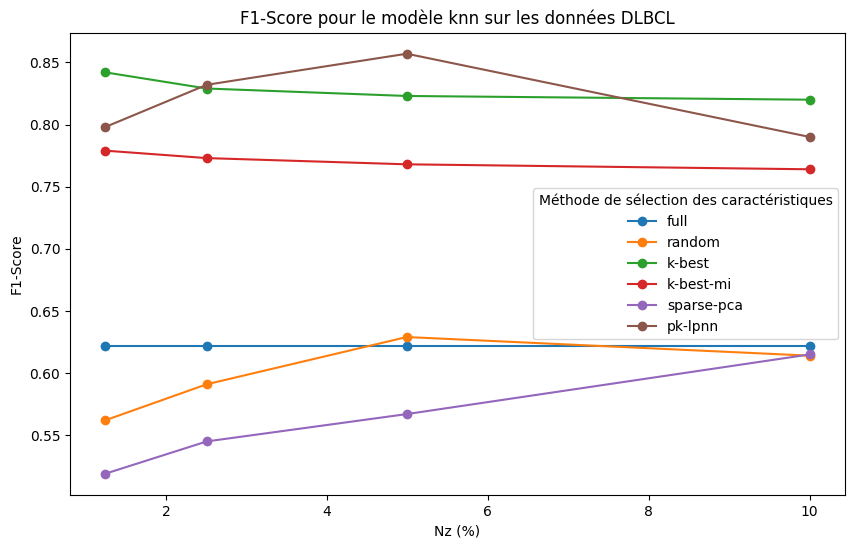

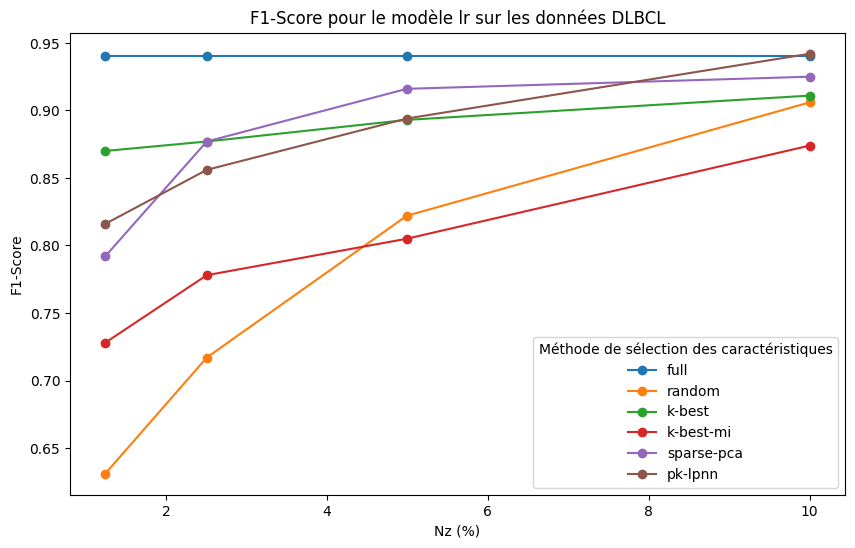

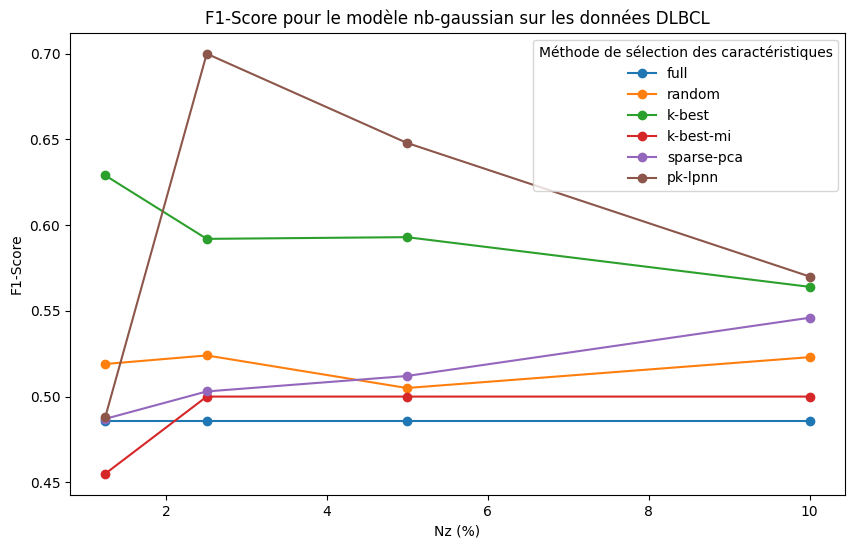

In [74]:
# Stockage des résultats
results_d = {model: {fts_mode: [] for fts_mode in fts_modes} for model in models}

# Lecture des fichiers pour chaque modèle
for model in models:
    for fts_mode in fts_modes:
        for nz in nzs:
            file_path = os.path.join(results_folder, f"{nz}", f"{fts_mode}_{nz}_{model}.pkl")
            
            # Vérification et lecture
            if os.path.exists(file_path):
                with open(file_path, "rb") as fh:
                    results = pickle.load(fh)
                    f1 = np.mean(results["f1"]).round(3)  # Moyenne de F1
                    results_d[model][fts_mode].append(f1)
            else:
                print(f"File not found: {file_path}")
                results_d[model][fts_mode].append(None)  # Ajouter None si le fichier n'est pas trouvé

# Tracer les courbes pour chaque modèle
for model, fts_data in results_d.items():
    plt.figure(figsize=(10, 6))  # Créer une nouvelle figure pour chaque modèle
    for fts_mode, f1_scores in fts_data.items():
        plt.plot(nzs_percent, f1_scores, label=f"{fts_mode}", marker='o')  # Tracer chaque courbe pour chaque méthode
    
    # Ajouter un titre et des labels
    plt.title(f"F1-Score pour le modèle {model} sur les données DLBCL")
    plt.xlabel("Nz (%)")
    plt.ylabel("F1-Score")
    plt.legend(title="Méthode de sélection des caractéristiques")
    plt.grid(False)

    # Sauvegarder le graphique dans un fichier PDF
    save_folder = "C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_DLBCL/PLOT"
    os.makedirs(save_folder, exist_ok=True)
    save_path = os.path.join(save_folder, f"F1_score_{model}_DLBCL_method.pdf")
    plt.savefig(save_path)

    # Afficher le graphique
    #plt.show()

    print(f"Graphique sauvegardé dans : {save_path}")

### Balanced Accuracy

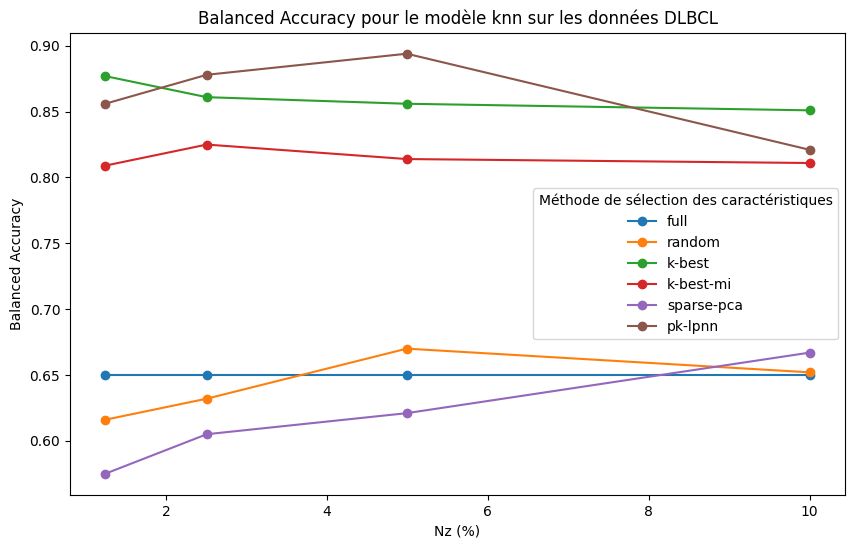

Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_DLBCL/PLOT\Balanced_Accuracy_knn_DLBCL_method.pdf


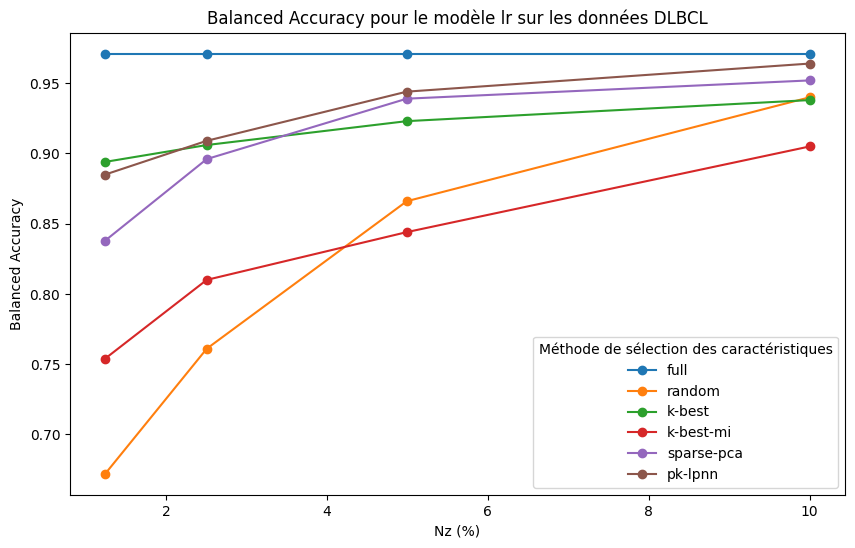

Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_DLBCL/PLOT\Balanced_Accuracy_lr_DLBCL_method.pdf


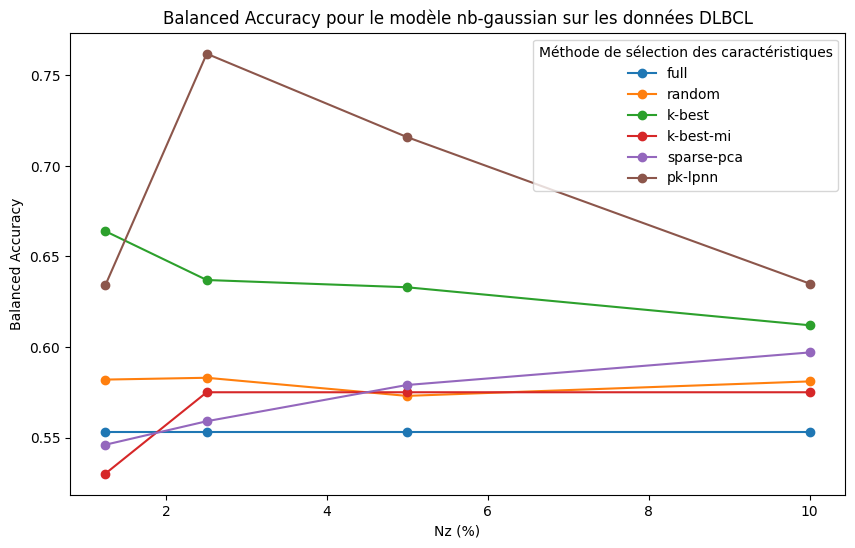

Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_DLBCL/PLOT\Balanced_Accuracy_nb-gaussian_DLBCL_method.pdf


In [75]:
# Stockage des résultats
results_d = {model: {fts_mode: [] for fts_mode in fts_modes} for model in models}

# Lecture des fichiers pour chaque modèle
for model in models:
    for fts_mode in fts_modes:
        for nz in nzs:
            file_path = os.path.join(results_folder, f"{nz}", f"{fts_mode}_{nz}_{model}.pkl")
            
            # Vérification et lecture
            if os.path.exists(file_path):
                with open(file_path, "rb") as fh:
                    results = pickle.load(fh)
                    b_acc = np.mean(results["b_acc"]).round(3)  # Moyenne de Balanced Accuracy
                    results_d[model][fts_mode].append(b_acc)
            else:
                print(f"File not found: {file_path}")
                results_d[model][fts_mode].append(None)  # Ajouter None si le fichier n'est pas trouvé

# Tracer les courbes pour chaque modèle
for model, fts_data in results_d.items():
    plt.figure(figsize=(10, 6))  # Créer une nouvelle figure pour chaque modèle
    for fts_mode, b_acc_scores in fts_data.items():
        plt.plot(nzs_percent, b_acc_scores, label=f"{fts_mode}", marker='o')  # Tracer chaque courbe pour chaque méthode
    
    # Ajouter un titre et des labels
    plt.title(f"Balanced Accuracy pour le modèle {model} sur les données DLBCL")
    plt.xlabel("Nz (%)")
    plt.ylabel("Balanced Accuracy")
    plt.legend(title="Méthode de sélection des caractéristiques")
    plt.grid(False)

    # Sauvegarder le graphique dans un fichier PDF
    save_folder = "C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_DLBCL/PLOT"
    os.makedirs(save_folder, exist_ok=True)
    save_path = os.path.join(save_folder, f"Balanced_Accuracy_{model}_DLBCL_method.pdf")
    plt.savefig(save_path)

    # Afficher le graphique
    #plt.show()

    print(f"Graphique sauvegardé dans : {save_path}")

# 3. Prostate

## Path

In [102]:
results_folder = os.path.join("C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_Prostate")
results_folder

'C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_Prostate'

## Parameters

In [103]:
nzs = ["158", "315", "630", "1260"]
fts_modes = ["full", "random", "k-best", "k-best-mi", "sparse-pca", "pk-lpnn"]
models = ["knn", "lr", "nb-gaussian" ]#"svc"]
max_nz = 12600  # Valeur maximale de Nz

# Calcul des pourcentages
nzs_percent = [int(nz) / max_nz * 100 for nz in nzs]

## Courbe des classif

### F1 score

In [104]:
# Stockage des résultats
results_d = {}

for fts_mode in fts_modes:
    results_d[fts_mode] = {model: [] for model in models}
    
    for nz in nzs:
        for model in models:
            # Construire le chemin vers le fichier
            file_path = os.path.join(results_folder, f"{nz}", f"{fts_mode}_{nz}_{model}.pkl")
            
            # Vérification et lecture
            if os.path.exists(file_path):
                with open(file_path, "rb") as fh:
                    results = pickle.load(fh)
                    f1 = np.mean(results["f1"]).round(3)  # Moyenne de F1
                    results_d[fts_mode][model].append(f1)
            else:
                print(f"File not found: {file_path}")
                results_d[fts_mode][model].append(None)  # Aucun résultat si le fichier est absent

In [105]:
# Création du dossier pour sauvegarder les graphiques si il n'existe pas
save_folder = os.path.join("C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_Prostate/PLOT")
os.makedirs(save_folder, exist_ok=True)

In [106]:
# Tracer et sauvegarder les résultats
for fts_mode, models_data in results_d.items():
    plt.figure(figsize=(10, 6))  # Créer une nouvelle figure pour chaque méthode de sélection de caractéristiques
    for model, scores in models_data.items():
        plt.plot(nzs_percent, scores, label=model, marker='o')  # Courbe pour chaque classifieur
    
    # Titre avec le nom de données (Leukemia) ajouté
    plt.title(f"F1-Score des données Prostate pour la méthode {fts_mode}")
    plt.xlabel("Nz (%)")
    plt.ylabel("F1-Score")
    plt.legend()
    plt.grid(False)
    
    # Sauvegarde dans un fichier PDF
    save_path = os.path.join(save_folder, f"F1_score_{fts_mode}_Prostate.pdf")
    plt.savefig(save_path)
    plt.close()  # Fermer la figure pour éviter de garder en mémoire

    print(f"Graphique sauvegardé dans : {save_path}")

Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_Prostate/PLOT\F1_score_full_Prostate.pdf
Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_Prostate/PLOT\F1_score_random_Prostate.pdf
Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_Prostate/PLOT\F1_score_k-best_Prostate.pdf
Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_Prostate/PLOT\F1_score_k-best-mi_Prostate.pdf
Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_Prostate/PLOT\F1_score_sparse-pca_Prostate.pdf
Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_Prostate/PLOT\F1_score_pk-lpnn_Prostate.pdf


### Balanced accuracy

In [107]:
# Stockage des résultats
results_d = {}

for fts_mode in fts_modes:
    results_d[fts_mode] = {model: [] for model in models}
    
    for nz in nzs:
        for model in models:
            # Construire le chemin vers le fichier
            file_path = os.path.join(results_folder, f"{nz}", f"{fts_mode}_{nz}_{model}.pkl")
            
            # Vérification et lecture
            if os.path.exists(file_path):
                with open(file_path, "rb") as fh:
                    results = pickle.load(fh)
                    f1 = np.mean(results["b_acc"]).round(3)  # Moyenne de F1
                    results_d[fts_mode][model].append(f1)
            else:
                print(f"File not found: {file_path}")
                results_d[fts_mode][model].append(None)  # Aucun résultat si le fichier est absent

In [108]:
# Création du dossier pour sauvegarder les graphiques si il n'existe pas
save_folder = os.path.join("C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_Prostate/PLOT")
os.makedirs(save_folder, exist_ok=True)

In [109]:
# Tracer et sauvegarder les résultats
for fts_mode, models_data in results_d.items():
    plt.figure(figsize=(10, 6))  # Créer une nouvelle figure pour chaque méthode de sélection de caractéristiques
    for model, scores in models_data.items():
        plt.plot(nzs_percent, scores, label=model, marker='o')  # Courbe pour chaque classifieur
    
    # Titre avec le nom de données (Leukemia) ajouté
    plt.title(f"Balanced accuracy des données Prostate pour la méthode {fts_mode}")
    plt.xlabel("Nz (%)")
    plt.ylabel("Balanced accuracy")
    plt.legend()
    plt.grid(False)
    
    # Sauvegarde dans un fichier PDF
    save_path = os.path.join(save_folder, f"Balanced accuracy_{fts_mode}_Prostate.pdf")
    plt.savefig(save_path)
    plt.close()  # Fermer la figure pour éviter de garder en mémoire

    print(f"Graphique sauvegardé dans : {save_path}")

Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_Prostate/PLOT\Balanced accuracy_full_Prostate.pdf
Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_Prostate/PLOT\Balanced accuracy_random_Prostate.pdf
Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_Prostate/PLOT\Balanced accuracy_k-best_Prostate.pdf
Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_Prostate/PLOT\Balanced accuracy_k-best-mi_Prostate.pdf
Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_Prostate/PLOT\Balanced accuracy_sparse-pca_Prostate.pdf
Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_Prostate/PLOT\Balanced accuracy_pk-lpnn_Prostate.pdf


## Courbe des Méthodes

### F1 score

Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_Prostate/PLOT\F1_score_knn_Prostate_method.pdf
Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_Prostate/PLOT\F1_score_lr_Prostate_method.pdf
Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_Prostate/PLOT\F1_score_nb-gaussian_Prostate_method.pdf


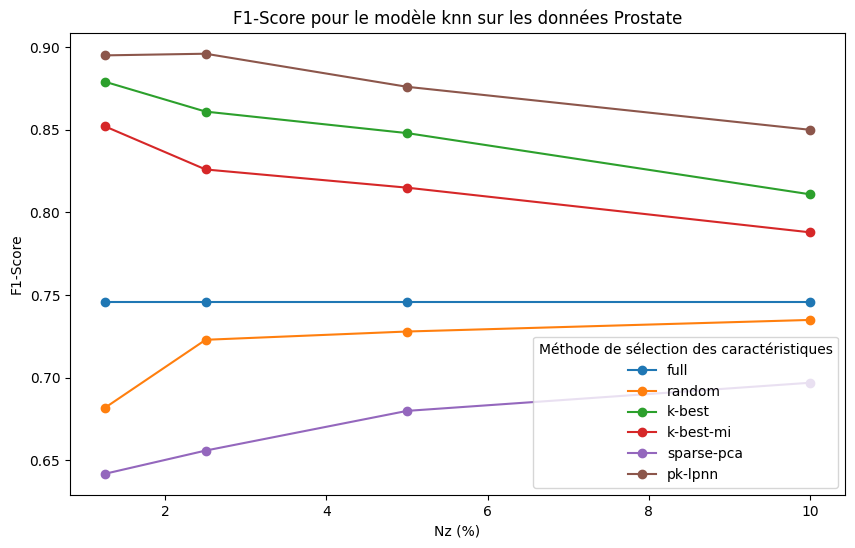

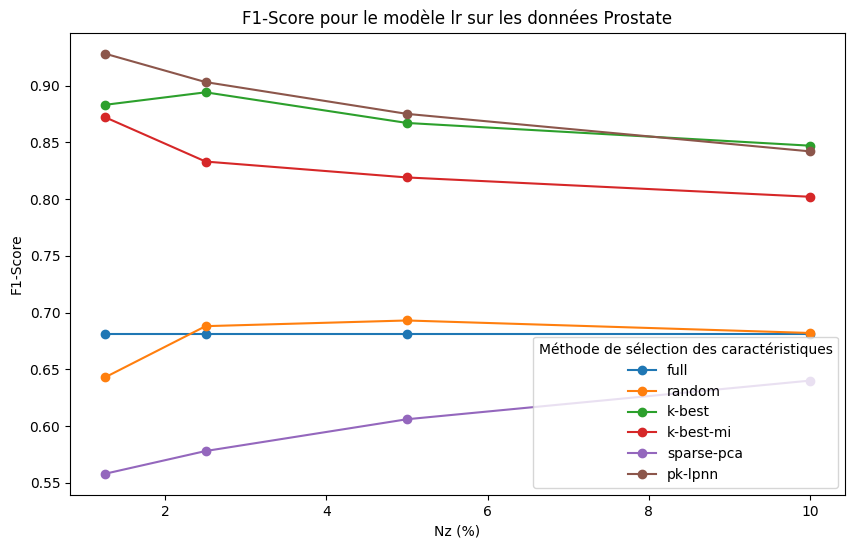

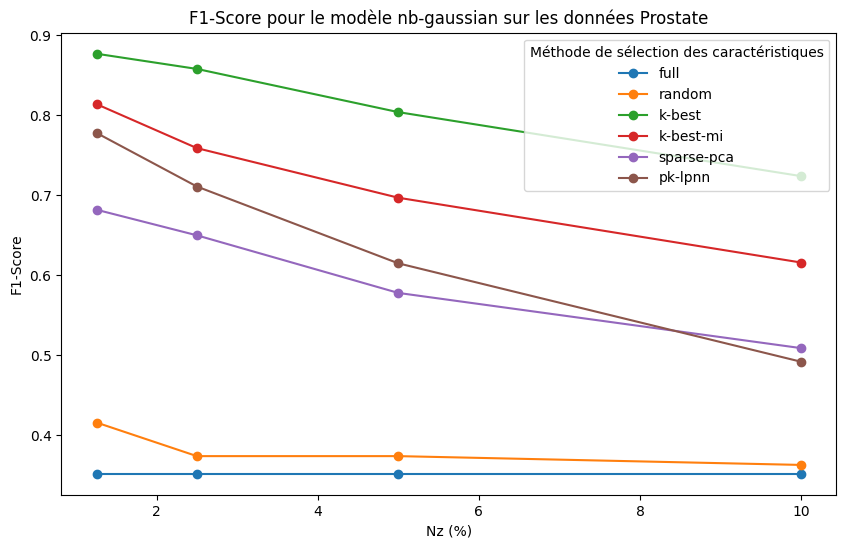

In [110]:
# Stockage des résultats
results_d = {model: {fts_mode: [] for fts_mode in fts_modes} for model in models}

# Lecture des fichiers pour chaque modèle
for model in models:
    for fts_mode in fts_modes:
        for nz in nzs:
            file_path = os.path.join(results_folder, f"{nz}", f"{fts_mode}_{nz}_{model}.pkl")
            
            # Vérification et lecture
            if os.path.exists(file_path):
                with open(file_path, "rb") as fh:
                    results = pickle.load(fh)
                    f1 = np.mean(results["f1"]).round(3)  # Moyenne de F1
                    results_d[model][fts_mode].append(f1)
            else:
                print(f"File not found: {file_path}")
                results_d[model][fts_mode].append(None)  # Ajouter None si le fichier n'est pas trouvé

# Tracer les courbes pour chaque modèle
for model, fts_data in results_d.items():
    plt.figure(figsize=(10, 6))  # Créer une nouvelle figure pour chaque modèle
    for fts_mode, f1_scores in fts_data.items():
        plt.plot(nzs_percent, f1_scores, label=f"{fts_mode}", marker='o')  # Tracer chaque courbe pour chaque méthode
    
    # Ajouter un titre et des labels
    plt.title(f"F1-Score pour le modèle {model} sur les données Prostate")
    plt.xlabel("Nz (%)")
    plt.ylabel("F1-Score")
    plt.legend(title="Méthode de sélection des caractéristiques")
    plt.grid(False)

    # Sauvegarder le graphique dans un fichier PDF
    save_folder = "C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_Prostate/PLOT"
    os.makedirs(save_folder, exist_ok=True)
    save_path = os.path.join(save_folder, f"F1_score_{model}_Prostate_method.pdf")
    plt.savefig(save_path)

    # Afficher le graphique
    #plt.show()

    print(f"Graphique sauvegardé dans : {save_path}")

### Balanced Accuracy

Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_Prostate/PLOT\Balanced_Accuracy_knn_Prostate_method.pdf
Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_Prostate/PLOT\Balanced_Accuracy_lr_Prostate_method.pdf
Graphique sauvegardé dans : C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_Prostate/PLOT\Balanced_Accuracy_nb-gaussian_Prostate_method.pdf


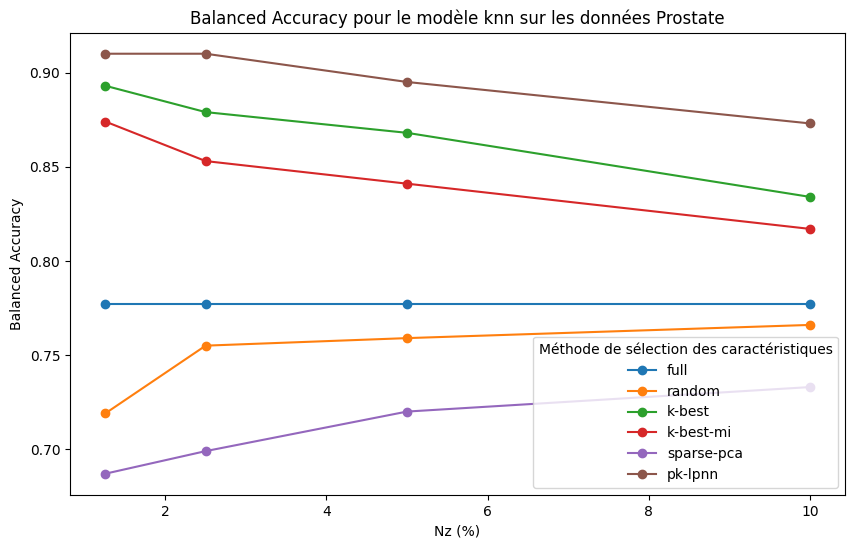

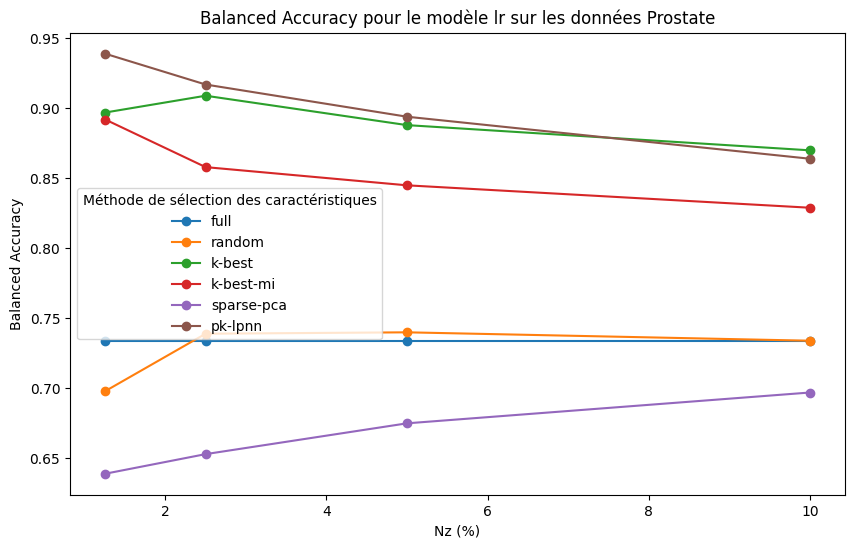

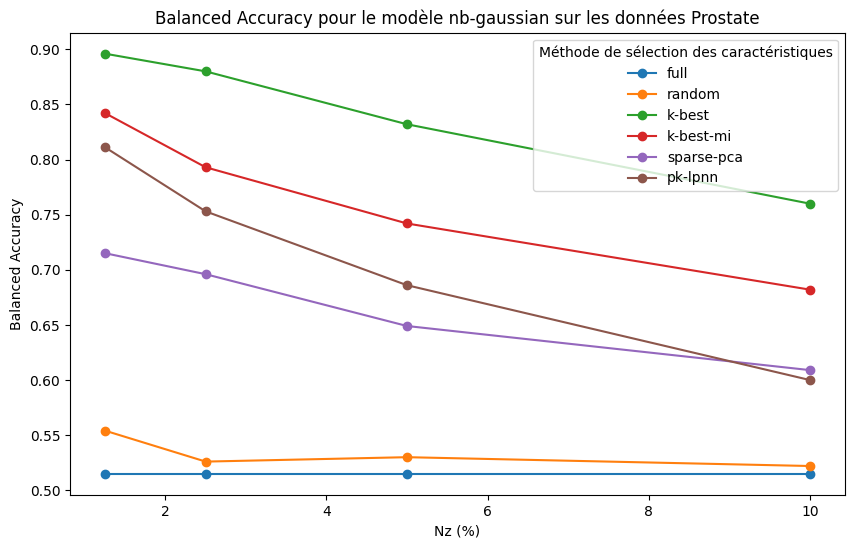

In [111]:
# Stockage des résultats
results_d = {model: {fts_mode: [] for fts_mode in fts_modes} for model in models}

# Lecture des fichiers pour chaque modèle
for model in models:
    for fts_mode in fts_modes:
        for nz in nzs:
            file_path = os.path.join(results_folder, f"{nz}", f"{fts_mode}_{nz}_{model}.pkl")
            
            # Vérification et lecture
            if os.path.exists(file_path):
                with open(file_path, "rb") as fh:
                    results = pickle.load(fh)
                    b_acc = np.mean(results["b_acc"]).round(3)  # Moyenne de Balanced Accuracy
                    results_d[model][fts_mode].append(b_acc)
            else:
                print(f"File not found: {file_path}")
                results_d[model][fts_mode].append(None)  # Ajouter None si le fichier n'est pas trouvé

# Tracer les courbes pour chaque modèle
for model, fts_data in results_d.items():
    plt.figure(figsize=(10, 6))  # Créer une nouvelle figure pour chaque modèle
    for fts_mode, b_acc_scores in fts_data.items():
        plt.plot(nzs_percent, b_acc_scores, label=f"{fts_mode}", marker='o')  # Tracer chaque courbe pour chaque méthode
    
    # Ajouter un titre et des labels
    plt.title(f"Balanced Accuracy pour le modèle {model} sur les données Prostate")
    plt.xlabel("Nz (%)")
    plt.ylabel("Balanced Accuracy")
    plt.legend(title="Méthode de sélection des caractéristiques")
    plt.grid(False)

    # Sauvegarder le graphique dans un fichier PDF
    save_folder = "C:/Users/DELL/Documents/Python/Application/Fer application/genetic_data/genetic_data_Prostate/PLOT"
    os.makedirs(save_folder, exist_ok=True)
    save_path = os.path.join(save_folder, f"Balanced_Accuracy_{model}_Prostate_method.pdf")
    plt.savefig(save_path)

    # Afficher le graphique
    #plt.show()

    print(f"Graphique sauvegardé dans : {save_path}")